<a href="https://colab.research.google.com/github/Voidmort/Study-Notes-TensorFlow/blob/master/TensorFlow_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: TensorFlow 5
date: 2019-01-09 10:10:00
tags: Tensorflow
categories: Tensorflow
---

# 表示法（Representation）

机器学习模型不能直接看到、听到或感知输入样本。必须创建数据表示，为模型提供有用的信号来了解数据的关键特性。也就是说，为了训练模型，必须选择最能代表数据的特征集。

## 特征工程

传统编程的关注点是代码。在机器学习项目中，关注点变成了表示。也就是说，开发者通过添加和改善特征来调整模型。

### 将原始数据映射到特征

下图左侧边是来自数据源的原始数据，右侧表示特征矢量，也就是组成数据集中样本的浮点值集。 特征工程指的是将原始数据转换为特征矢量。进行特征工程预计需要大量时间。

机器学习模型通常期望样本表示为实数矢量。这种矢量的构建方法如下：为每个字段衍生特征，然后将它们全部连接到一起

![数据映射到特征](https://developers.google.com/machine-learning/crash-course/images/RawDataToFeatureVector.svg)


### 映射数值

机器学习模型根据浮点值进行训练，因此整数和浮点原始数据不需要特殊编码。正如下图 所示，将原始整数值 6 转换为特征值 6.0 是没有意义的：

![映射数值](https://developers.google.com/machine-learning/crash-course/images/FloatingPointFeatures.svg)

### 映射字符串值

模型无法通过字符串值学习规律，因此您需要进行一些特征工程来将这些值转换为数字形式：

    1.首先，为您要表示的所有特征的字符串值定义一个词汇表。对于 street_name 特征，该词汇表中将包含您知道的所有街道。
    2.然后，使用该词汇表创建一个独热编码，用于将指定字符串值表示为二元矢量。在该矢量（与指定的字符串值对应）中：

        ·只有一个元素设为 1。
        ·其他所有元素均设为 0。
        ·该矢量的长度等于词汇表中的元素数。
        
下图显示了某条特定街道 (Shorebird Way) 的独热编码。在此二元矢量中，代表 Shorebird Way 的元素的值为 1，而代表所有其他街道的元素的值为 θ。

![映射字符串值](https://developers.google.com/machine-learning/crash-course/images/OneHotEncoding.svg)

### 映射分类（枚举）值

分类特征具有一组离散的可能值。例如，名为 Lowland Countries 的特征只包含 3 个可能值：

    {'Netherlands', 'Belgium', 'Luxembourg'}
  
您可能会将分类特征（如 Lowland Countries）编码为枚举类型或表示不同值的整数离散集。例如：

    将荷兰表示为 0
    将比利时表示为 1
    将卢森堡表示为 2
    
不过，机器学习模型通常将每个分类特征表示为单独的布尔值。例如，Lowland Countries 在模型中可以表示为 3 个单独的布尔值特征：

    x1：是荷兰吗？
    x2：是比利时吗？
    x3：是卢森堡吗？
    
采用这种方法编码还可以简化某个值可能属于多个分类这种情况（例如，“与法国接壤”对于比利时和卢森堡来说都是 True）。

## 良好特征的特点

我们探索了将原始数据映射到合适特征矢量的方法，但这只是工作的一部分。现在，我们必须探索什么样的值才算这些特征矢量中良好的特征。

### 避免很少使用的离散特征值

良好的特征值应该在数据集中出现大约 5 次以上。这样一来，模型就可以学习该特征值与标签是如何关联的。也就是说，大量离散值相同的样本可让模型有机会了解不同设置中的特征，从而判断何时可以对标签很好地做出预测。

例如，house_type 特征可能包含大量样本，其中它的值为 victorian：

    house_type: victorian

相反，如果某个特征的值仅出现一次或者很少出现，则模型就无法根据该特征进行预测。

例如，unique_house_id 就不适合作为特征，因为每个值只使用一次，模型无法从中学习任何规律：

    unique_house_id: 8SK982ZZ1242Z

### 最好具有清晰明确的含义

每个特征对于项目中的任何人来说都应该具有清晰明确的含义。

例如，下面的房龄适合作为特征，可立即识别为年龄：

    house_age: 27

相反，对于下方特征值的含义，除了创建它的工程师，其他人恐怕辨识不出：

    house_age: 851472000

在某些情况下，混乱的数据（而不是糟糕的工程选择）会导致含义不清晰的值。

例如，以下 user_age 的来源没有检查值恰当与否：

    user_age: 277

### 不要将“神奇”的值与实际数据混为一谈

良好的浮点特征不包含超出范围的异常断点或“神奇”的值。

例如，假设一个特征具有 0 到 1 之间的浮点值。那么，如下值是可以接受的：

    quality_rating: 0.82
    quality_rating: 0.37

不过，如果用户没有输入 quality_rating，则数据集可能使用如下神奇值来表示不存在该值：

    quality_rating: -1

为解决神奇值的问题，需将该特征转换为两个特征：

    一个特征只存储质量评分，不含神奇值。
    一个特征存储布尔值，表示是否提供了 quality_rating。为该布尔值特征指定一个名称，例如 is_quality_rating_defined。

### 考虑上游不稳定性

特征的定义不应随时间发生变化。

例如，下列值是有用的，因为城市名称一般不会改变。（注意，我们仍然需要将“br/sao_paulo”这样的字符串转换为独热矢量。）

    city_id: "br/sao_paulo"

但收集由其他模型推理的值会产生额外成本。可能值“219”目前代表圣保罗，但这种表示在未来运行其他模型时可能轻易发生变化：

    inferred_city_cluster: "219"

## 数据清理

苹果树结出的果子有品相上乘的，也有虫蛀坏果。而高端便利店出售的苹果是 100% 完美的水果。从果园到水果店之间，专门有人花费大量时间将坏苹果剔除或给可以挽救的苹果涂上一层薄薄的蜡。作为一名机器学习工程师，您将花费大量的时间挑出坏样本并加工可以挽救的样本。即使是非常少量的“坏苹果”也会破坏掉一个大规模数据集。

### 缩放特征值

缩放是指将浮点特征值从自然范围（例如 100 到 900）转换为标准范围（例如 0 到 1 或 -1 到 +1）。如果某个特征集只包含一个特征，则缩放可以提供的实际好处微乎其微或根本没有。不过，如果特征集包含多个特征，则缩放特征可以带来以下优势：

    ·帮助梯度下降法更快速地收敛。
    ·帮助避免“NaN 陷阱”。在这种陷阱中，模型中的一个数值变成 NaN（例如，当某个值在训练期间超出浮点精确率限制时），并且模型中的所有其他数值最终也会因数学运算而变成 NaN。
    ·帮助模型为每个特征确定合适的权重。如果没有进行特征缩放，则模型会对范围较大的特征投入过多精力。

您不需要对每个浮点特征进行完全相同的缩放。即使特征 A 的范围是 -1 到 +1，同时特征 B 的范围是 -3 到 +3，也不会产生什么恶劣的影响。不过，如果特征 B 的范围是 5000 到 100000，您的模型会出现糟糕的响应。

```
要缩放数字数据，一种显而易见的方法是将 [最小值，最大值] 以线性方式映射到较小的范围，例如 [-1，+1]。

另一种热门的缩放策略是计算每个值的 Z 得分。Z 得分与距离均值的标准偏差数相关。换而言之：

    scaled value = (value - mean) / stddev
    
例如，给定以下条件：

    ·均值 = 100
    ·标准偏差 = 20
    ·原始值 = 130
    
则：

  scaled_value = (130 - 100) / 20
  scaled_value = 1.5
使用 Z 得分进行缩放意味着，大多数缩放后的值将介于 -3 和 +3 之间，而少量值将略高于或低于该范围。```

```

### 处理极端离群值

分箱



### 清查

截至目前，我们假定用于训练和测试的所有数据都是值得信赖的。在现实生活中，数据集中的很多样本是不可靠的，原因有以下一种或多种：

    遗漏值。 例如，有人忘记为某个房屋的年龄输入值。
    重复样本。 例如，服务器错误地将同一条记录上传了两次。
    不良标签。 例如，有人错误地将一颗橡树的图片标记为枫树。
    不良特征值。 例如，有人输入了多余的位数，或者温度计被遗落在太阳底下。

一旦检测到存在这些问题，您通常需要将相应样本从数据集中移除，从而“修正”不良样本。要检测遗漏值或重复样本，可以编写一个简单的程序。检测不良特征值或标签可能会比较棘手。

除了检测各个不良样本之外，还必须检测集合中的不良数据。直方图是一种用于可视化集合中数据的很好机制。此外，收集如下统计信息也会有所帮助：

    最大值和最小值
    均值和中间值
    标准偏差

考虑生成离散特征的最常见值列表。例如，country:uk 的样本数是否符合您的预期？language:jp 是否真的应该作为您数据集中的最常用语言？

了解数据

遵循以下规则：

    记住预期的数据状态。
    确认数据是否满足这些预期（或者您可以解释为何数据不满足预期）。
    仔细检查训练数据是否与其他来源（例如信息中心）的数据一致。
    像处理任何任务关键型代码一样谨慎处理您的数据。良好的机器学习依赖于良好的数据。

# 特征集编程练习

创建一个包含极少特征但效果与更复杂的特征集一样出色的集合

## 设置

和之前一样，我们先加载并准备加利福尼亚州住房数据。

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://download.mlcc.google.cn/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

In [0]:
# 预处理
def preprocess_features(california_housing_dataframe):
    selected_features = california_housing_dataframe[
        ["latitude",
         "longitude",
         "housing_median_age",
         "total_rooms",
         "total_bedrooms",
         "population",
         "households",
         "median_income"]]
    
    processed_features = selected_features.copy()
    
    processed_features["rooms_per_person"] = (
        california_housing_dataframe["total_rooms"]/
        california_housing_dataframe["population"])
    return processed_features

def preprocess_targets(california_housing_dataframe):
    output_targets = pd.DataFrame()
    # Scale the target to be in units of thousands of dollars.
    output_targets["median_house_value"] = (
      california_housing_dataframe["median_house_value"] / 1000.0)
    return output_targets

In [3]:
# 抽取前 12000 个数据作训练集
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))

# 抽取最后 5000 个作验证集
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))

# 检查一下我们的数据是否正常合理
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.6,2655.8,543.1,1433.2,504.6,3.9,2.0
std,2.1,2.0,12.6,2180.4,425.2,1122.9,387.0,1.9,1.1
min,32.5,-124.3,2.0,2.0,1.0,3.0,1.0,0.5,0.1
25%,33.9,-121.8,18.0,1467.0,298.0,793.0,283.0,2.6,1.5
50%,34.2,-118.5,29.0,2127.0,435.0,1170.0,410.0,3.5,1.9
75%,37.7,-118.0,37.0,3157.2,653.0,1726.0,608.0,4.8,2.3
max,42.0,-114.6,52.0,32627.0,6445.0,28566.0,6082.0,15.0,55.2


Validation examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.7,-119.6,28.6,2614.5,530.5,1420.8,493.0,3.9,2.0
std,2.1,2.0,12.6,2178.9,412.5,1205.6,378.5,2.0,1.3
min,32.5,-124.3,1.0,18.0,3.0,8.0,3.0,0.5,0.0
25%,33.9,-121.8,18.0,1445.0,294.0,780.0,276.8,2.6,1.5
50%,34.3,-118.5,29.0,2130.5,430.0,1159.5,406.0,3.5,1.9
75%,37.7,-118.0,37.0,3129.2,637.0,1700.8,595.0,4.7,2.3
max,41.8,-114.3,52.0,37937.0,5471.0,35682.0,5189.0,15.0,52.0


Training targets summary:


,median_house_value
count,12000.0
mean,207.5
std,115.4
min,15.0
25%,119.9
50%,181.1
75%,265.6
max,500.0


Validation targets summary:


,median_house_value
count,5000.0
mean,206.9
std,117.5
min,15.0
25%,118.8
50%,178.4
75%,263.1
max,500.0


## 构建良好的特征集

**如果只使用 2 个或 3 个特征，您可以获得的最佳效果是什么？**

**相关矩阵**展现了两两比较的相关性，既包括每个特征与目标特征之间的比较，也包括每个特征与其他特征之间的比较。

在这里，相关性被定义为[皮尔逊相关系数](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient)。您不必理解具体数学原理也可完成本练习。

相关性值具有以下含义：

  * `-1.0`：完全负相关
  * `0.0`：不相关
  * `1.0`：完全正相关

In [4]:
correlation_dataframe = training_examples.copy()
correlation_dataframe["target"] = training_targets["median_house_value"]

correlation_dataframe.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person,target
latitude,1.0,-0.9,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,0.1,-0.1
longitude,-0.9,1.0,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.1,-0.0
housing_median_age,0.0,-0.1,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,-0.1,0.1
total_rooms,-0.0,0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,-0.1,0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.1,0.0
population,-0.1,0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.1,-0.0
households,-0.1,0.1,-0.3,0.9,1.0,0.9,1.0,0.0,-0.0,0.1
median_income,-0.1,-0.0,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.3,0.7
rooms_per_person,0.1,-0.1,-0.1,0.1,0.1,-0.1,-0.0,0.3,1.0,0.2
target,-0.1,-0.0,0.1,0.1,0.0,-0.0,0.1,0.7,0.2,1.0


 理想情况下，我们希望具有与目标密切相关的特征。

此外，我们还希望有一些相互之间的相关性不太密切的特征，以便它们添加独立信息。

利用这些信息来尝试移除特征。您也可以尝试构建其他合成特征，例如两个原始特征的比例。

为方便起见，我们已经添加了前一个练习的训练代码。

In [0]:
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

def train_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear regression model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearRegressor` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods

  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
    
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["median_house_value"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["median_house_value"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["median_house_value"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")

  
  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  return linear_regressor

搜索一组效果良好的特征和训练参数

Training model...
RMSE (on training data):
  period 00 : 115.69
  period 01 : 115.56
  period 02 : 116.82
  period 03 : 115.67
  period 04 : 115.57
  period 05 : 116.72
  period 06 : 116.71
  period 07 : 119.22
  period 08 : 115.56
  period 09 : 115.40
Model training finished.


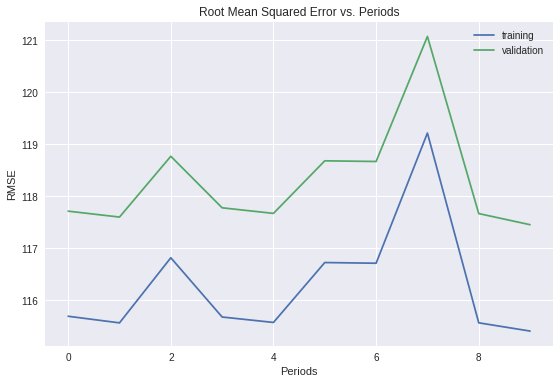

Training model...
RMSE (on training data):
  period 00 : 165.32
  period 01 : 125.38
  period 02 : 116.53
  period 03 : 115.99
  period 04 : 115.63
  period 05 : 114.81
  period 06 : 114.06
  period 07 : 113.58
  period 08 : 114.35
  period 09 : 112.88
Model training finished.


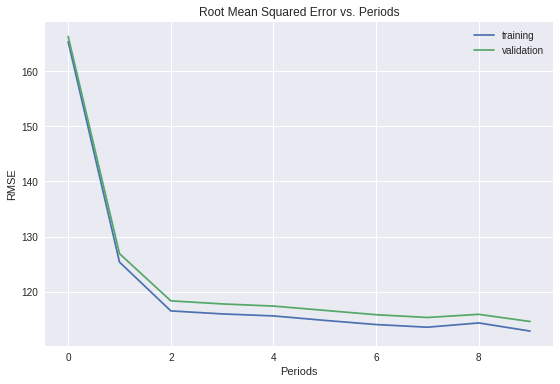

In [6]:
minimal_features = [
  "latitude",
  "longitude",
]

minimal_training_examples = training_examples[minimal_features]
minimal_validation_examples = validation_examples[minimal_features]

_ = train_model(
    learning_rate=0.01,
    steps=500,
    batch_size=5,
    training_examples=minimal_training_examples,
    training_targets=training_targets,
    validation_examples=minimal_validation_examples,
    validation_targets=validation_targets)

plt.show()

minimal_features = [
  "median_income",
  "latitude",
]

minimal_training_examples = training_examples[minimal_features]
minimal_validation_examples = validation_examples[minimal_features]

_ = train_model(
    learning_rate=0.01,
    steps=500,
    batch_size=5,
    training_examples=minimal_training_examples,
    training_targets=training_targets,
    validation_examples=minimal_validation_examples,
    validation_targets=validation_targets)

plt.show()

观察发现 经度 和 维度 貌似是没有什么相关度的，个人收入的中位数 和 维度 是一组比较好的特征组。

 ## 更好地利用纬度

绘制 `latitude` 与 `median_house_value` 的图形后，表明两者确实不存在线性关系。

不过，有几个峰值与洛杉矶和旧金山大致相对应。

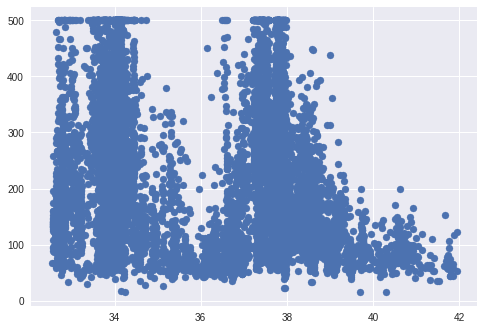

In [7]:
plt.scatter(training_examples["latitude"], training_targets["median_house_value"])

 **尝试创建一些能够更好地利用纬度的合成特征。**

例如，您可以创建某个特征，将 `latitude` 映射到值 `|latitude - 38|`，并将该特征命名为 `distance_from_san_francisco`。

或者，您可以将该空间分成 10 个不同的分桶（例如 `latitude_32_to_33`、`latitude_33_to_34` 等）：如果 `latitude` 位于相应分桶范围内，则显示值 `1.0`；如果不在范围内，则显示值 `0.0`。

使用相关矩阵来指导您构建合成特征；如果您发现效果还不错的合成特征，可以将其添加到您的模型中。

 除了 `latitude` 之外，我们还会保留 `median_income`，以便与之前的结果进行比较。

我们决定对纬度进行分桶。在 Pandas 中使用 `Series.apply` 执行此操作相当简单。

In [0]:
LATITUDE_RANGES = zip(range(32, 44), range(33, 45))
def select_and_transform_features(source_df):
    selected_examples = pd.DataFrame()
    selected_examples["median_income"] = source_df["median_income"]
    for r in LATITUDE_RANGES:
      selected_examples["latitude_%d_to_%d" % r] = source_df["latitude"].apply(
        lambda l: 1.0 if l >= r[0] and l < r[1] else 0.0)
    return selected_examples

In [24]:
selected_training_examples = select_and_transform_features(training_examples)
selected_training_examples.head(2)

,median_income,latitude_32_to_33,latitude_33_to_34,latitude_34_to_35,latitude_35_to_36,latitude_36_to_37,latitude_37_to_38,latitude_38_to_39,latitude_39_to_40,latitude_40_to_41,latitude_41_to_42,latitude_42_to_43,latitude_43_to_44
4828,3.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6103,4.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
selected_validation_examples = select_and_transform_features(validation_examples)
selected_validation_examples.head(2)

,median_income,latitude_32_to_33,latitude_33_to_34,latitude_34_to_35,latitude_35_to_36,latitude_36_to_37,latitude_37_to_38,latitude_38_to_39,latitude_39_to_40,latitude_40_to_41,latitude_41_to_42,latitude_42_to_43,latitude_43_to_44
8959,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8330,2.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Training model...
RMSE (on training data):
  period 00 : 227.14
  period 01 : 216.98
  period 02 : 206.92
  period 03 : 196.96
  period 04 : 187.10
  period 05 : 177.38
  period 06 : 167.81
  period 07 : 158.44
  period 08 : 149.28
  period 09 : 140.38
Model training finished.


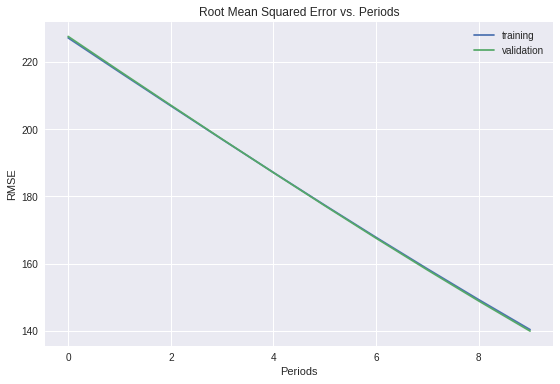

In [25]:
_ = train_model(
    learning_rate=0.01,
    steps=500,
    batch_size=5,
    training_examples=selected_training_examples,
    training_targets=training_targets,
    validation_examples=selected_validation_examples,
    validation_targets=validation_targets)